In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# **Using PCAs for Image Compression**

PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

PCA’s key advantages are its low noise sensitivity, the
decreased requirements for capacity and memory, and
increased efficiency given the processes taking place in a
smaller dimensions

(722, 690, 3)


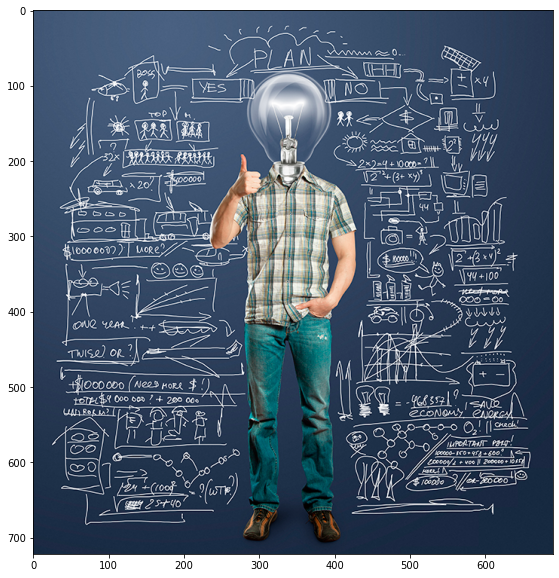

In [ ]:
img=plt.imread('/content/lead-image-105.png')
print(img.shape)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
img_2 = img.reshape(722,690*3) # Converting 3-D to 2-D
print(img_2.shape)

(722, 2070)


In [ ]:
img_pca = PCA(n_components=100)
img_pca.fit(img_2) 
img_transformed = img_pca.transform(img_2) 
print(img_transformed.shape) 
print(np.sum(img_pca.explained_variance_ratio_) )

(722, 100)
0.7981041


In [ ]:
img_temp = img_pca.inverse_transform(img_transformed) 
print(img_temp.shape)
img_temp = img_temp.reshape(722,690,3)  
print(img_temp.shape)

(722, 2070)
(722, 690, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


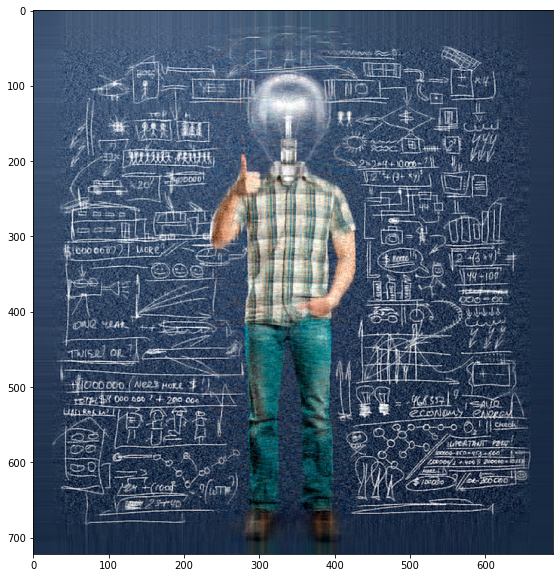

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img_temp)

In [ ]:
n_comp_pca=[10,25,50,100,250,360,600,722]
for i in n_comp_pca:
  img_pca = PCA(n_components=i)
  img_pca.fit(img_2) 
  img_transformed = img_pca.transform(img_2) 
  print("n_components = ",i,img_transformed.shape) 
  print(np.sum(img_pca.explained_variance_ratio_) )

n_components =  10 (722, 10)
0.41107595
n_components =  25 (722, 25)
0.5423614
n_components =  50 (722, 50)
0.66223335
n_components =  100 (722, 100)
0.79809296
n_components =  250 (722, 250)
0.9582486
n_components =  360 (722, 360)
0.9892336
n_components =  600 (722, 600)
0.9998392
n_components =  722 (722, 722)
1.0000001


In [ ]:
img_temp = img_pca.inverse_transform(img_transformed) 
print(img_temp.shape)
img_temp = img_temp.reshape(722,690,3)  
print(img_temp.shape)

(722, 2070)
(722, 690, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


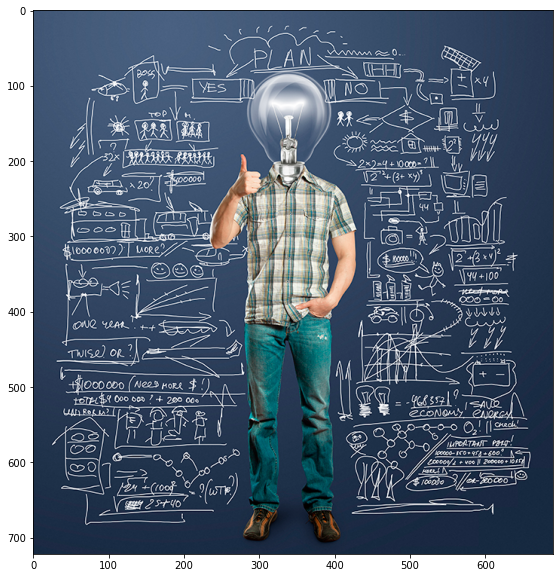

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img_temp)

# **PCA for Image Compression- Using Eigenfaces**

Eigenfaces is a method that is useful for face recognition and detection by determining the variance of faces in a collection of face images and use those variances to encode and decode a face in a machine learning way without the full information reducing computation and space complexity.

In [ ]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [ ]:
dir='/content/gdrive/MyDrive/lfwcrop_grey_small/faces'
photos=os.listdir(dir)[1:1001]
images_path=[dir+'/' + photo for photo in photos]
images=np.array([plt.imread(image) for image in images_path], dtype=np.float64)
images_flatten=np.array([plt.imread(image).flatten() for image in images_path], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in photos]
n_samples, h, w = images.shape


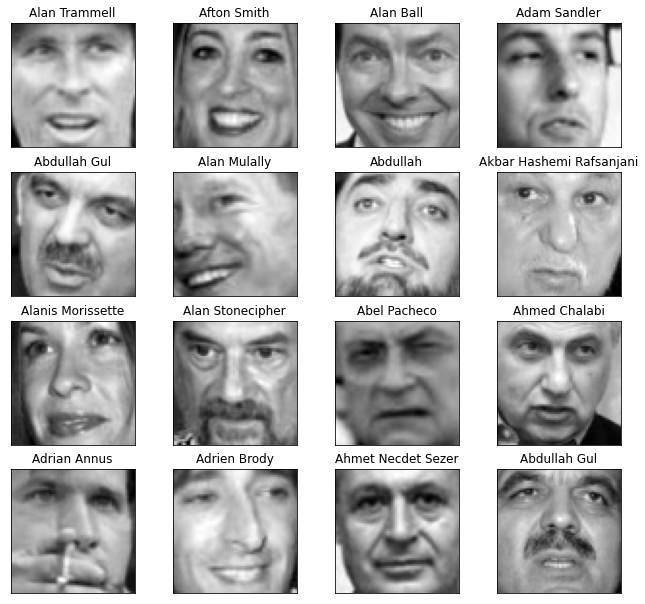

In [ ]:
plot_portraits(images, celebrity_names, h, w, n_row=4, n_col=4)

In [ ]:
images.shape

(999, 64, 64)

In [ ]:
images_flatten.shape

(999, 4096)

In [ ]:
faces_pca = PCA(n_components=50)
faces_pca.fit(images_flatten)


PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
components = faces_pca.transform(images_flatten)
projected = faces_pca.inverse_transform(components)


In [ ]:
components.shape

(999, 50)

In [ ]:
projected.shape

(999, 4096)

In [ ]:
final_images=[]
for i in range(999):
  ord = projected[i]
  img = ord.reshape(64,64)
  final_images.append(img)

In [ ]:
final_images=np.array(final_images)

In [ ]:
final_images.shape

(999, 64, 64)

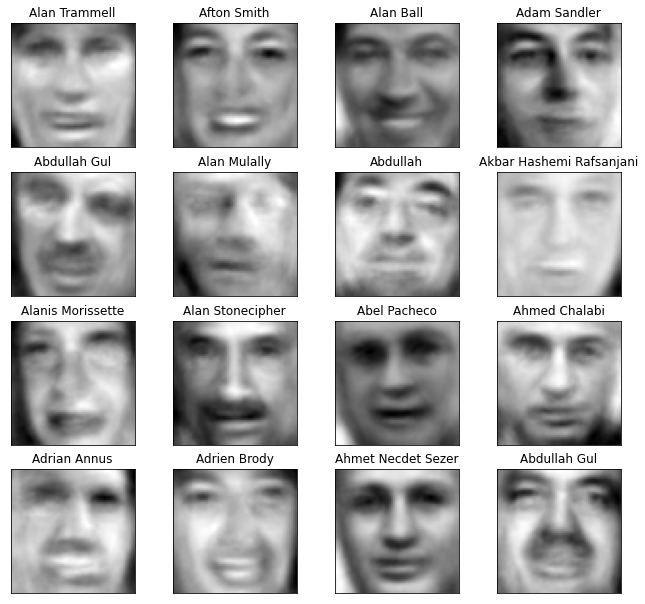

In [ ]:
plot_portraits(final_images, celebrity_names,h,w, n_row=4, n_col=4)

In [ ]:
faces_pca = PCA(n_components=500)
faces_pca.fit(images_flatten)
components = faces_pca.transform(images_flatten)
projected = faces_pca.inverse_transform(components)
final_images=[]
for i in range(999):
  ord = projected[i]
  img = ord.reshape(64,64)
  final_images.append(img)
final_images=np.array(final_images)

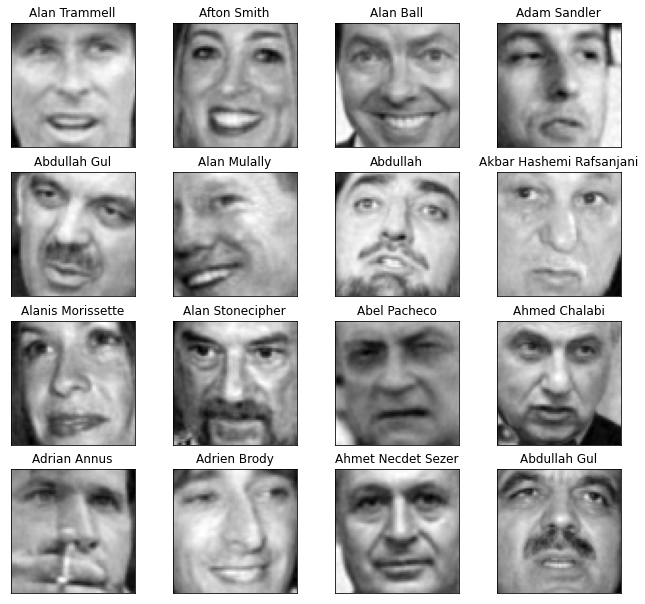

In [ ]:
plot_portraits(final_images, celebrity_names,h,w, n_row=4, n_col=4)

# **KNN for Image Segmentation**

Image segmentation helps determine the relations between objects, as well as the context of objects in an image. Applications include face recognition, number plate identification, and satellite image analysis. Industries like retail and fashion use image segmentation, for example, in image-based searches.

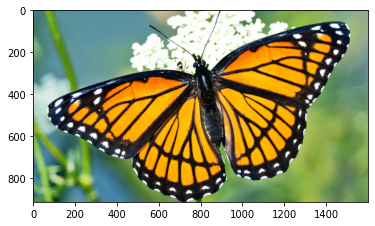

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
image = cv2.imread('/content/viceroy-butterfly_1600.jpg') 

# Change color to RGB (from BGR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(image)


In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB) 
pixel_vals = image.reshape((-1,3)) 
  
# Convert to float type 
pixel_vals = np.float32(pixel_vals)

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,  
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) becomes 90% 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.90) 
  
# then perform k-means clustering wit h number of clusters defined as 3 
#also random centres are initally chosed for k-means clustering 
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

'''
compactness : It is the sum of squared distance from each point to their corresponding centers.
labels : This is the label array , where each element marked '0', '1'.....
centers : This is array of centers of clusters.
'''


"\ncompactness : It is the sum of squared distance from each point to their corresponding centers.\nlabels : This is the label array , where each element marked '0', '1'.....\ncenters : This is array of centers of clusters.\n"

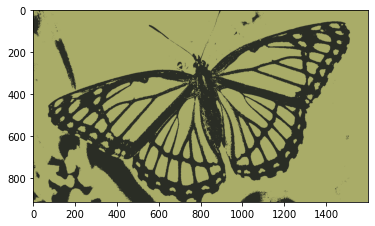

In [ ]:
# convert data into 8-bit values 
centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 
  
# reshape data into the original image dimensions 
segmented_image = segmented_data.reshape((image.shape)) 
  
plt.imshow(segmented_image)